# 9 Nov 2024
TimeSeries


In [ ]:
# piece of code for getting data from google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
df_2018 = pd.read_excel('/content/gold2018.xlsx')
df_2019 = pd.read_excel('/content/gold2019.xlsx')
df_2020 = pd.read_excel('/content/gold2020.xlsx')
df_2021 = pd.read_excel('/content/gold2021.xlsx')


In [ ]:
df_2018.head()

,DATE,Price
0,2018-12-05,30827
1,2018-12-04,30969
2,2018-12-03,30666
3,2018-11-30,30289
4,2018-11-29,30403


In [ ]:
# Set the dataframe correctly

# merge or concat the data into single dataframe
df = pd.concat([df_2018,df_2019,df_2020,df_2021],axis=0)
df.head()

,DATE,Price
0,2018-12-05,30827
1,2018-12-04,30969
2,2018-12-03,30666
3,2018-11-30,30289
4,2018-11-29,30403


In [ ]:
# Sort the data
df.sort_values(by='DATE',inplace=True)
df.head()

,DATE,Price
38,2018-10-12,31876
37,2018-10-15,32264
36,2018-10-16,32109
35,2018-10-17,32043
34,2018-10-18,32037


In [ ]:
df.sample(10)

,DATE,Price
116,2021-06-24,47708
60,2021-09-10,47334
216,2019-02-01,35341
147,2020-05-13,42336
213,2020-02-05,42024
13,2021-11-16,49439
30,2019-10-25,38265
8,2018-11-23,30937
64,2019-09-06,38834
14,2020-11-16,50842


In [ ]:
# set the index to DATE
df.set_index('DATE',inplace=True)


KeyError: "None of ['DATE'] are in the columns"

In [ ]:
df.head(20)

,Price
DATE,
2018-10-12,31876
2018-10-15,32264
2018-10-16,32109
2018-10-17,32043
2018-10-18,32037
2018-10-19,32026
2018-10-22,31879
2018-10-23,32182
2018-10-24,31948


In [ ]:
df.tail(10)

,Price
DATE,
2021-11-22,48762
2021-11-23,47688
2021-11-24,47485
2021-11-25,47608
2021-11-26,48161
2021-11-29,48042
2021-11-30,48085
2021-12-01,47633
2021-12-02,47402


## Data Cleaning

In [ ]:
df.isnull().sum()

,0
Price,0


In [ ]:
df.duplicated().sum()

18

In [ ]:
# data visualisation  EDA

df.describe()

,Price
count,758.000000
mean,43096.828496
std,6789.493745
min,30289.000000
25%,36082.500000
50%,45162.000000
75%,48660.000000
max,56834.000000


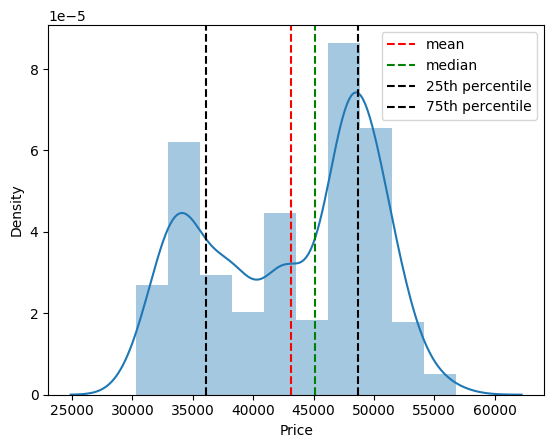

In [ ]:
# univariate Analysis

sns.distplot(df['Price'])
plt.axvline(df['Price'].mean(),color='red',linestyle='dashed',label='mean')
plt.axvline(df['Price'].median(),color='green',linestyle='dashed',label='median')

plt.axvline(x=np.percentile(df['Price'],25),color='black',linestyle='dashed',label='25th percentile')
plt.axvline(x=np.percentile(df['Price'],75),color='black',linestyle='dashed',label='75th percentile')
plt.legend()
plt.show()

Observation :
since we have diffetent mean and median value so the plot is skewed
as we have median on the right of mean so our graph is negatively skewed.

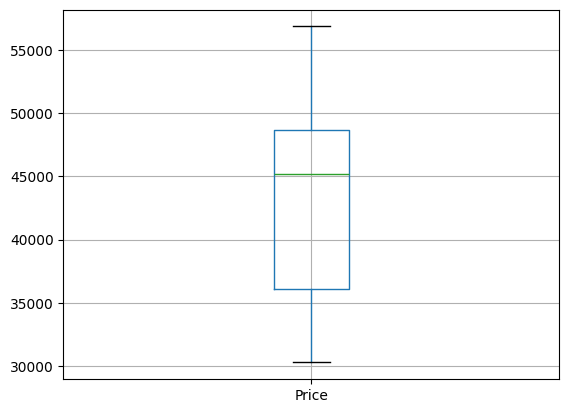

In [ ]:
# find the outliers

df.boxplot(column='Price')
plt.show()

Observation:
1. There are no outliers
2. MEDIAN IS skewed MORE TO THE HIGHER PRICE VALUES
3. Trend analysis is required because of non stationarity

### Check Trends in data

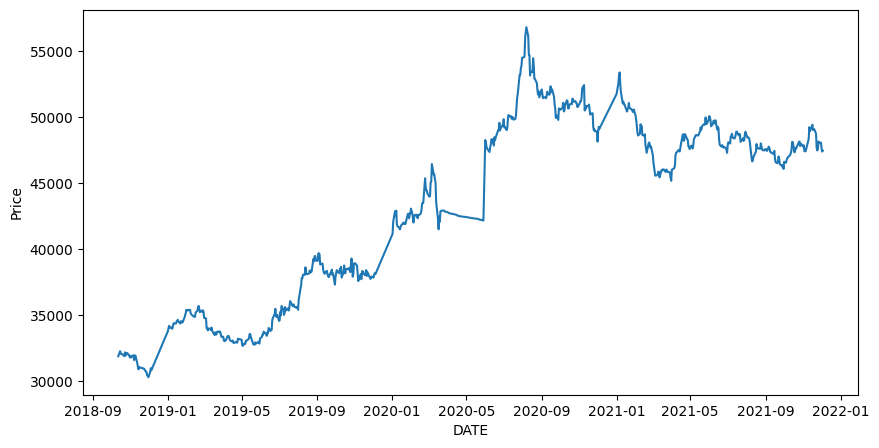

In [ ]:
#trend analysis
plt.figure(figsize=(10,5))
sns.lineplot(x='DATE',y='Price',data=df)
plt.show()

observation:
1. this data has irregular trend with couple of troughs and crests
2. Linear and constant were there but they did'nt stay but its more like a exponential pattern that can be seen


In [ ]:
!pip install calplot

import calplot

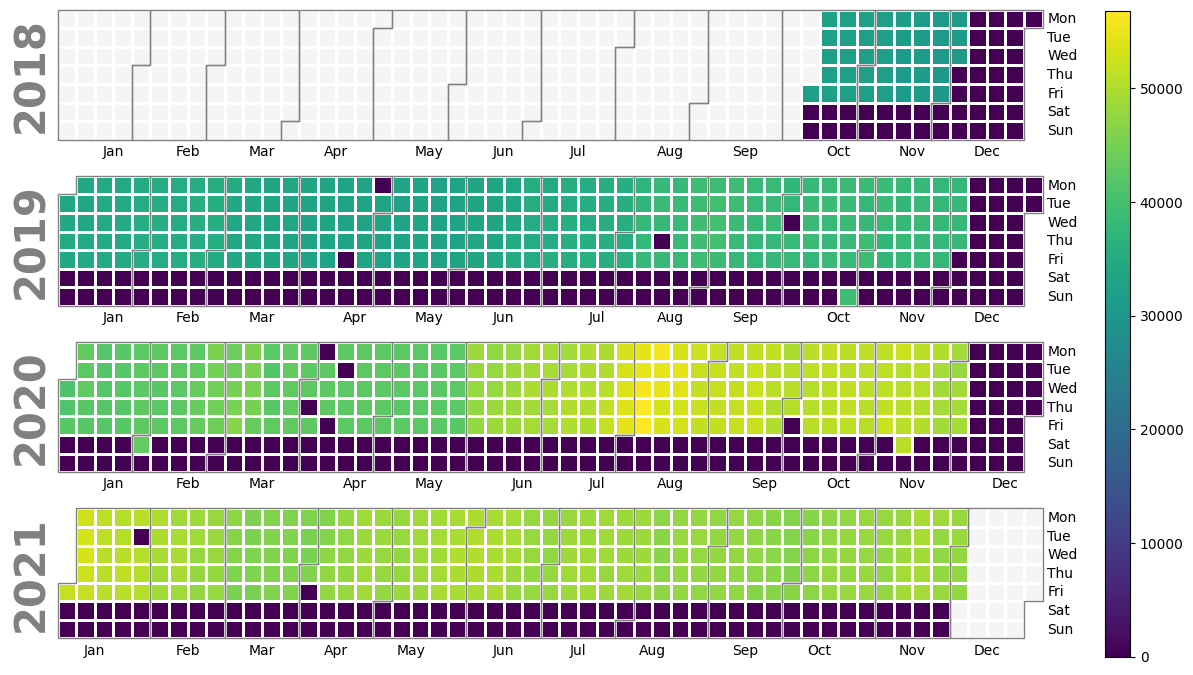

In [ ]:
calplot.calplot(df['Price'])
plt.show()

## Trend ans seasonality

In [ ]:
df['Year'] = df.index.year
df['Month'] = df.index.month
#df['Day'] = df.index.day
df.head()

,Price,Year,Month
DATE,,,
2018-10-12,31876,2018,10
2018-10-15,32264,2018,10
2018-10-16,32109,2018,10
2018-10-17,32043,2018,10
2018-10-18,32037,2018,10


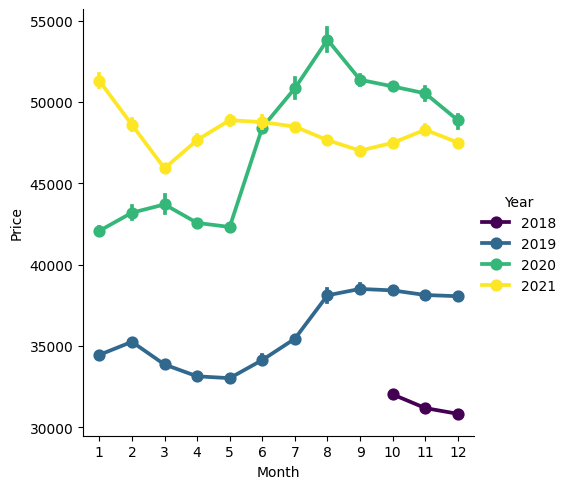

In [ ]:
sns.catplot(x='Month',y='Price',data=df,hue ='Year',kind ='point',palette='viridis')
plt.show()

observation:
Every year in month of January there is a jump in gold prices.
A new year is a kind of booster for gold prices

In [ ]:
# aggregation
df_year =df[['Price','Year']].groupby(by='Year').sum()
df_year

,Price
Year,
2018,1226479
2019,8572844
2020,11362886
2021,11505187


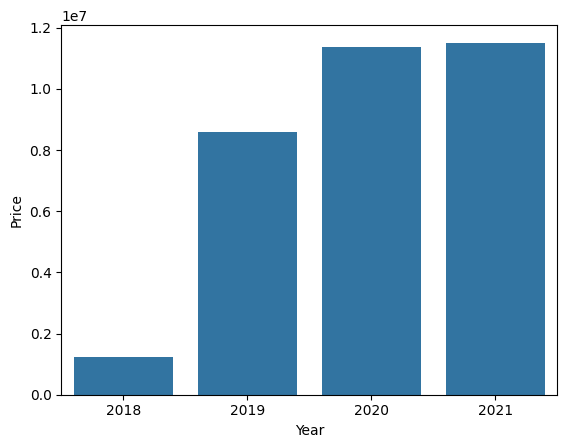

In [ ]:
sns.barplot(x=df_year.index,y=df_year['Price'])
plt.show()

### Boxplot Seasonality

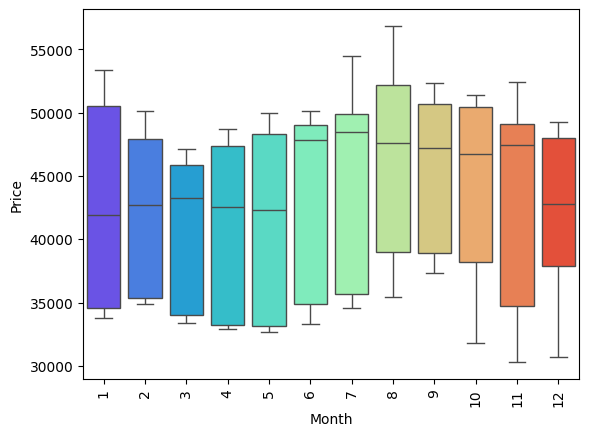

In [ ]:
# Monthly for all 4 years
sns.boxplot(x=df['Month'],y=df['Price'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

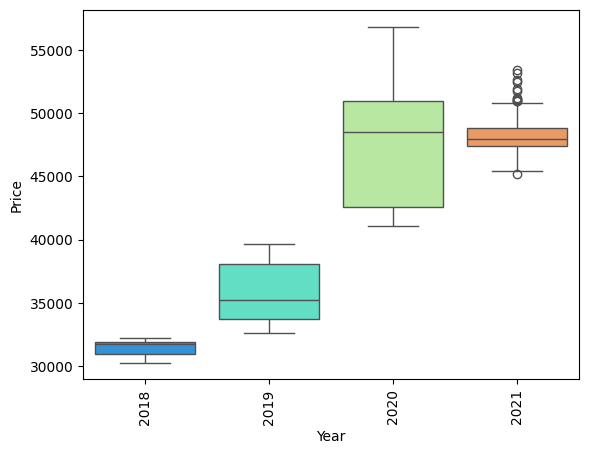

In [ ]:
# Yearly
sns.boxplot(x=df['Year'],y=df['Price'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# weekly
df['day'] = df.index.day_name()
df['Weekday'] = df.index.weekday
df['Weekday']= np.where(df['Weekday']<5,1,0)
df.head()

,Price,Year,Month,day,Weekday
DATE,,,,,
2018-10-12,31876,2018,10,Friday,1
2018-10-15,32264,2018,10,Monday,1
2018-10-16,32109,2018,10,Tuesday,1
2018-10-17,32043,2018,10,Wednesday,1
2018-10-18,32037,2018,10,Thursday,1


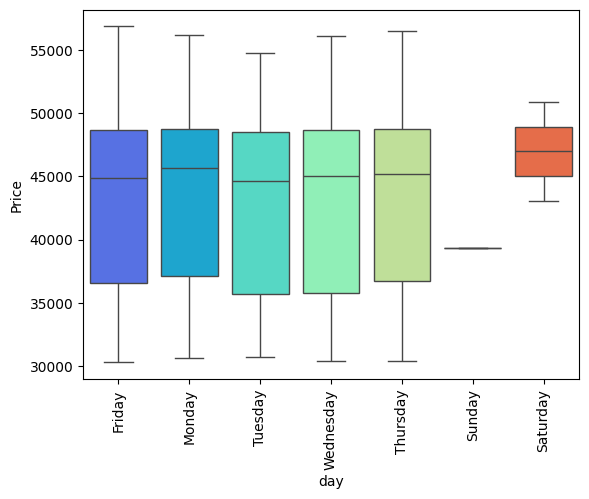

In [ ]:
# weekday seasonality
sns.boxplot(x=df['day'],y=df['Price'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

## Time series Decomposition

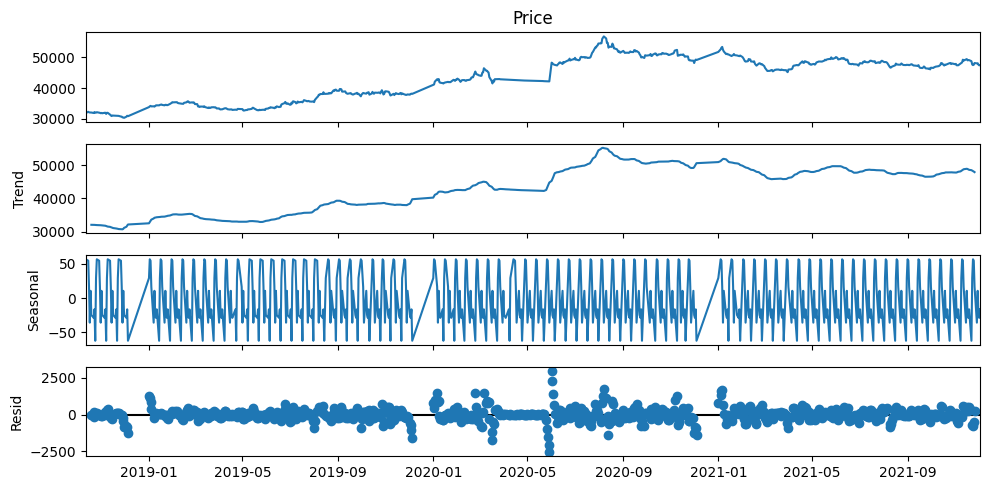

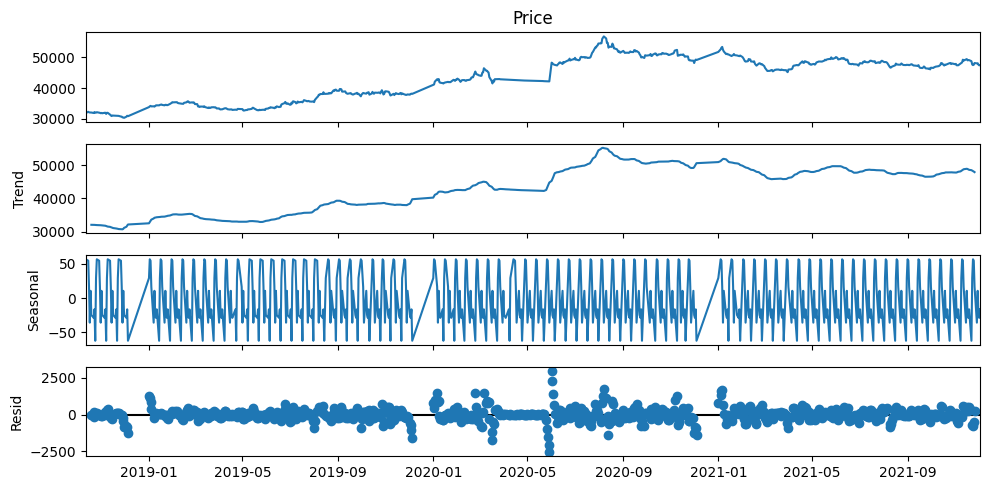

In [ ]:
# Decomposition Plot
from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition
plt.rc('figure',figsize=(10,5))
decomposition = seasonal_decompose(df['Price'],model='additive',period = 10)
fig = decomposition.plot()
decomposition.plot()
plt.show()

 # check for stationarity with another usecase

 # using ADF test-
 1. purpose- unit root in the time series data
 2. Hypothesis-
  2.1. Null Hypothesis will suggest that it has a unit root. i.e. it is non stationary in nature

  2.2 Alternste HYpothesis - It does not have a unit root.i.e. data is stationary in nature
 3. Test Statistice - will give a -ve no.
  if p-value<0.05 :we reject Null hyp
  else
  we accept the null hypothesis

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  #Determing rolling statistics
  rolmean = timeseries.rolling(window=12).mean()
  rolstd = timeseries.rolling(window=12).std()

  #plotting
  plt.figure(figsize=(10,5))
  plt.plot(timeseries,color='blue',label='original')
  plt.plot(rolmean,color='red',label='rolling mean')
  plt.plot(rolstd,color='black',label='rolling std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and standard deviatin')
  plt.show()

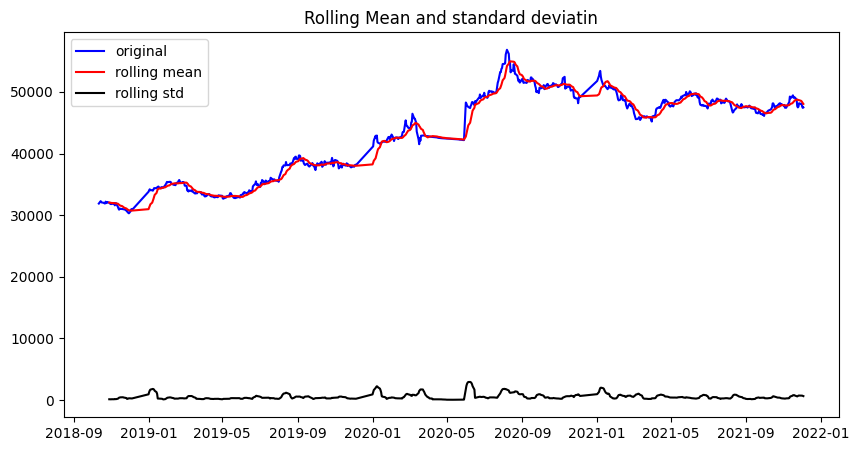

In [ ]:
test_stationarity(df['Price'])

In [ ]:
# check for hypothesis
result = adfuller(df['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.553070
p-value: 0.507114


**observation** :from this

we have p >0.05 therefore, we can't reject the null Hypothesis i.e.
the data is non stationary.
with
**graph** also the **observation** is clear that the rolling mean value is clearly increasing overtime and therefore, not a stationary series

tomm:
# Forecasting Models:
1. Naive model
2. ACF , PACF model
3. ARIMA model
4. SARIMAX Model
5. PROPHET

--------------
* LSTM
GRU, Sequential model
